In [1]:
%load_ext autoreload
%autoreload 2
from src.data_processing import load_data
import itertools
import string

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from src.ngrams import *
from src.string_similarity import levenshtein
import operator
from src.data_processing import print_progress
from nltk import word_tokenize, pos_tag
from src.ngrams import get_three_gram_wildcard
from collections import defaultdict

In [3]:
task1, task2, task3, min_pairs, strings, pun_strings = load_data()

In [4]:
with open("data/contractions.json") as f:
    contractions = json.load(f)

In [25]:
tempwords = [t['words'] for t in task1]

In [29]:
word_tokenize(' '.join(tempwords[3]))

['Dentists',
 'don',
 "'",
 't',
 'like',
 'a',
 'hard',
 'day',
 'at',
 'the',
 'orifice',
 '.']

In [4]:
ngram_frequencies = json.load(open("data/ngram_frequencies.json"))
task2_frequencies = [n for i, n in enumerate(ngram_frequencies) if task1[i]['pun']]

FileNotFoundError: [Errno 2] No such file or directory: 'data/ngram_frequencies.json'

In [6]:
def window_compression(threshold):
    count = 0
    target_counts = [0] * len(task2)
    total_ngrams = 0
    for i, trigrams in enumerate(task2_frequencies):
        increment = False
        total_ngrams += len(trigrams)
        for trigram in trigrams:
            if trigram[1] <= threshold:
                target_counts[i] += 1
    #         print(trigram)
            if task2[i]['target'] in trigram[0] and trigram[1] <= threshold:
                increment = True
        count += int(increment)

#     print("Windows containing pun: ", count / len(task2))
#     print("Average continaing ngrams: ", sum(target_counts) / len(task2))
#     print("Average ngrams: ", total_ngrams / len(task2))

    return count / len(task2), sum(target_counts) / len(task2)

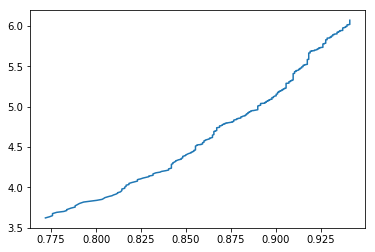

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
cr = [window_compression(i) for i in range(1001)]
plt.plot([c[0] for c in cr], [c[1] for c in cr])

In [ ]:
for i, c in enumerate(task1):
    freqs = []
    context = c['words']
    print_progress(i, len(task1))
    for i in range(1, len(context)-1):
        freqs.append((context[i-1:i+2], three_gram_frequency(context[i-1:i+2])))
    
    three_gram_frequencies.append(freqs)

 |███████████████████████████████████████████████-----------------------------------------------------| 46.8% 

KeyboardInterrupt: 

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/home/doogy/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/doogy/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 421, in execute_request
    self._abort_queues()
  File "/home/doogy/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 637, in _abort_queues
    self._abort_queue(stream)
  File "/home/doogy/.local/lib/python3.5/site-packages/ipyk

In [5]:
test_freqencies = [{'frequencies': t2} for t2 in task2_frequencies]
for i, t in enumerate(task2):
    test_freqencies[i]['text'] = t['words']
    test_freqencies[i]['target'] = t['target']

In [10]:
accepted_pos = {'ADV', 'ADJ', 'VERB', 'NOUN'}
def ngram_search(index):
    context = test_freqencies[index]
    threshold = 0
    res = {}
    print(index)
    pos_text = pos_tag(context['text'], tagset='universal')
    for i, (trigram, freq) in enumerate(context['frequencies']):
        if freq <= threshold and pos_text[i+1][1] in accepted_pos:
            res[(trigram[1], i+1, freq)] = get_three_gram_wildcard(trigram[0], trigram[2])
    return res

In [7]:
from multiprocessing import Pool
p = Pool(4)
ngram_search_space = p.map(ngram_search, range(len(test_freqencies)))

240
80
160
0
161
81
82
162
241
163
83
242
164
243
1
2
3
165
4
5
6
166
167
7
8
9
10
84
244
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
11
245
12
13
14
246
168
169
85
86
87
88
89
90
/home/doogy/Data/ngrams/3grams/c1/symbols/:.gz
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
247
170
/home/doogy/Data/ngrams/3grams/c1/symbols/;.gz
171
248
15
16
17
91
172
249
250
173
92
18
251
252
253
174
19
20
254
175
176
177
178
179
21
22
255
93
94
95
23
96
97
180
98
181
256
182
257
99
258
259
260
183
24
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
25
26
27
184
28
185
100
186
187
188
189
101
29
30
31
32
190
33
34
/home/doogy/Data/ngrams/3grams/c1/symbols/?.gz
35
102
191
103
192
193
194
195
196
261
197
198
199
200
104
105
262
106
107
108
36
37
38
39
201
40
/home/doogy/Data/ngrams/3grams/c1/symbols/?.gz
109
202
203
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
204
205
41
263
42
264
110
111
112
113
206
43
44
265
114
115
266
207
116
208
209
210
211
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz
117
118


1187
1188
1189
1190
1191
1262
1263
1264
1265
1192
1193
1266
1194
1195
1196
1197
1267
1268
1269
1270
1198
1199
/home/doogy/Data/ngrams/3grams/c1/symbols/..gz


In [11]:
new_search_space = []
for context in ngram_search_space:
    current = []
    for k, v in context.items():
        current.append((k, v))
    new_search_space.append(current)

In [7]:
with open("data/ngram_search_space.json", 'w') as f:
    json.dump(new_search_space, f)

In [11]:
ngram_search(0)

NameError: name 'test_freqencies' is not defined

In [12]:
task1[0]dd

{'pun': True,
 'words': ["'",
  "'",
  'I',
  "'",
  'm',
  'halfway',
  'up',
  'a',
  'mountain',
  ',',
  "'",
  "'",
  'Tom',
  'alleged',
  '.']}

In [35]:
accepted_pos = {'ADV', 'ADJ', 'VERB', 'NOUN'}
def generate_list(index):
    print(index)
    context = task1[index]
    words = context['words']
    threshold = 0
    res = defaultdict(dict)
    pos_text = pos_tag(words, tagset='universal')
    for i in range(1, len(pos_text)-2):
        if pos_text[i+1][1] not in accepted_pos:
            continue
        original_frequency = ngram_frequency(words[i:i+3])
        if  original_frequency > 10000:
            continue
        try:
            res[' '.join(words[i:i+3])]['original_frequency'] = original_frequency
            res[' '.join(words[i:i+3])]['substitutions'] = get_three_gram_wildcard(words[i], words[i+2])
        except:
            res[' '.join(words[i:i+3])] = "miss"
    with open("data/ngram_searchspace/{}".format(index), 'w') as f:
        json.dump(res, f, indent=4)
    return res

In [37]:
from multiprocessing import Pool
p = Pool(4)
ngram_search_space = p.map(generate_list, range(len(task1)))

336
0
112
224
225
226
1
337
2
227
228
229
338
339
340
230
3
113
4
5
231
341
6
114
115
7
232
8
116
233
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
Not a path:  /home/doogy/Data/3grams/c1/symbols/intterogation.gz
234
342
9
343
10
344
11
12
345
235
117
236
237
238
13
239
240
346
241
14
242
15
243
118
16
244
119
17
347
18
120
245
348
246
349
121
350
19
122
247
20
123
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
248
21
351
22
352
124
353
125
354
249
250
355
23
356
24
25
251
26
252
27
28
357
29
126
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
358
30
31
32
127
128
129
253
359
130
254
33
360
34
255
256
35
361
131
36
132
37
133
257
258
362
38
259
134
39
260
363
135
364
40
41
365
261
42
262
136
366
367
43
263
44
45
368
264
137
Not a path:  /home/doogy/Data/3grams/c1/symbols/intterogation.gz
46
369
47
265
138
139
140
48
266
49
50
141
267
142
51
52
268
269
53
270
271
370
Not a path:  /home/doogy/Data/3grams/c1/lower/8/_only.gz
371
143
372
144
373
145
Not a path

Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
1107
1108
1109
1332
1401
1402
1214
1110
1111
1215
1333
1334
1335
1112
1216
1217
1336
1403
1337
1404
1218
1405
1338
1113
Not a path:  /home/doogy/Data/3grams/c1/lower/’/_only.gz
1339
1340
1406
1407
1341
1114
1342
1219
1343
1456
1115
1220
1116
1117
1221
1222
1408
1409
1410
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
Not a path:  /home/doogy/Data/3grams/c1/symbols//.gz
1411
1223
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
1412
1457
1224
1118
1119
1413
1225
1226
1458
1568
1459
Not a path:  /home/doogy/Data/3grams/c1/symbols/colon.gz
1414
1415
1569
1227
1570
1460
1416
1461
1228
1462
1463
1571
1464
1417
1465
1229
1466
1572
1230
1573
1231
1574
1467
1680
1468
1681
1575
1682
1469
1470
1576
1683
1684
1471
1577
1472
1685
1473
1578
1686
1474
1579
1580
1581
1475
1476
1582
1687
1477
1478
1688
1689
1418
1583
1479
1690
1419
1691
1692
1480
1420
1693
1694
1481
1695
1696
1584
1421
1482
1483
1585
1697
1422
1484
1698
1586
16

Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*

In [1]:
import os
import json
ngram_totals = []
for i in range(1780):
    print(i)
    with open("data/ngram_searchspace/{}".format(i)) as f:
        ngram_totals.append(json.load(f))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [2]:
with open("data/ngram_searchspace/ngram_totals2.json", 'w') as f:
    json.dump(ngram_totals, f)

In [34]:
res

defaultdict(dict,
            {"' Tom alleged": {'original_frequency': 0, 'substitutions': {}},
             'I am halfway': {'original_frequency': 5519,
              'substitutions': {"I 'd halfway": 51,
               "I 'm halfway": 20637,
               "I 've halfway": 110,
               'I am halfway': 5519,
               'I are halfway': 116,
               'I arrived halfway': 88,
               'I came halfway': 102,
               'I can halfway': 192,
               'I climbed halfway': 53,
               'I come halfway': 53,
               'I could halfway': 99,
               'I decided halfway': 55,
               'I did halfway': 45,
               'I drove halfway': 103,
               'I even halfway': 46,
               'I feel halfway': 107,
               'I felt halfway': 76,
               'I flew halfway': 95,
               'I get halfway': 671,
               'I go halfway': 760,
               'I got halfway': 3000,
               'I had halfway': 121,
   